In [2]:
import pypsa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import math
import networkx as nx
import import_ipynb
import cartopy.crs as ccrs
from shapely.geometry import Polygon

In [ ]:
initial_network_nodes = pd.read_csv('database/substations_kalimantan.csv', sep = ",", quotechar = "'")

initial_network_nodes

In [ ]:
initial_network = pd.read_csv('database/lines_kalimantan.csv', sep = ",", quotechar = "'")

initial_network

In [ ]:
combined = initial_network.merge(initial_network_nodes, left_on = "nodeA", right_on = "node", suffixes = ("_left", "_right"))
combined = combined.merge(initial_network_nodes, left_on  = "nodeB", right_on = "node", suffixes = ("_A", "_B"))
combined = combined [["nodeA", "lon_A", "lat_A", "nodeB", "lon_B", "lat_B"]]

display(combined)

In [ ]:
basemap = folium.Map(location = [-0.152375, 113.899132], zoom_start = 6)

maxvoltage = max(initial_network_nodes.voltage)

for i in range(len(initial_network_nodes)):
    popupinfo = (initial_network_nodes.node.iloc[i]+ ",voltage:" + str(initial_network_nodes.voltage.iloc[i]))
    folium.CircleMarker(location = [initial_network_nodes.lat.iloc[i], initial_network_nodes.lon.iloc[i]], 
                       tooltip = popupinfo, color = "green", fill = True, 
                       radius = math.sqrt(10 * initial_network_nodes.voltage.iloc[i] / maxvoltage)).add_to(basemap)

for i in range(len(combined)):
    points = [[combined.lat_A.iloc[i], combined.lon_A.iloc[i]],
             [combined.lat_B.iloc[i], combined.lon_B.iloc[i]]]
    folium.PolyLine(points, color = "yellow", opacitiy = 0.7).add_to(basemap)
    
basemap.save("initial_nodes.html")

display(basemap)

In [2]:
vertices = pd.read_csv("database/substations_kalimantan.csv", sep = ",", quotechar = "'")
vertices.rename(columns = {"lon":"x", "lat":"y"}, inplace = True)

print(vertices["voltage"].value_counts(dropna = False))

150    63
275     1
Name: voltage, dtype: int64


In [3]:
vertices

,"""",node,type,x,y,frequency,voltage,node_id,wkt_srid_4326,""".1"
0,"""",GI_Sambas,substation,109.2688,1.3429,50,150,0,SRID=4326;POINT(109.2688 1.3429),""""
1,"""",GI_Singkawang,substation,108.9876,0.9266,50,150,1,SRID=4326;POINT(108.9876 0.9266),""""
2,"""",GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150,2,SRID=4326;POINT(108.8747 0.8361),""""
3,"""",GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150,3,SRID=4326;POINT(108.8653 0.83),""""
4,"""",GI_Senggiring,substation,108.9853,0.3162,50,150,4,SRID=4326;POINT(108.9853 0.3162),""""
...,...,...,...,...,...,...,...,...,...,...
59,"""",GI_Sangatta,substation,117.5693,0.4701,50,150,59,SRID=4326;POINT(117.5693 0.4701),""""
60,"""",GI_Malinau,substation,116.6286,3.5114,50,150,60,SRID=4326;POINT(116.6286 3.5114),""""
61,"""",GI_Tideng_Pale,substation,116.8411,3.5748,50,150,61,SRID=4326;POINT(116.8411 3.5748),""""
62,"""",GI_Muara_Wahau,substation,116.9215,1.0533,50,150,62,SRID=4326;POINT(116.9215 1.0533),""""


In [4]:
links = pd.read_csv("database/lines_kalimantan.csv", sep = ",", quotechar = "'")

links["cables"].fillna(3, inplace = True)
links["wires"].fillna(2, inplace = True)
links["length"] = links["length_m"]/1000.

print(links["voltage"].value_counts(dropna = False))

150    65
Name: voltage, dtype: int64


In [5]:
links

,"""",nodeA,nodeB,bus0,bus1,voltage,cables,wires,frequency,length_m,...,x_ohmkm,c_nfkm,i_th_max_a,lon0,lat0,lon1,lat1,wkt_srid_4326,""".1",length
0,"""",GI_Sambas,GI_Singkawang,0,1,150,3,2,50,59200,...,0.32,11.5,1.3,109.2688,1.3429,108.9876,0.9266,"SRID=4326;LINESTRING(109.2688 1.3429,108.9876 ...","""",59.200
1,"""",GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,3,2,50,20829,...,0.32,11.5,1.3,108.9876,0.9266,108.8653,0.8300,"SRID=4326;LINESTRING(108.9876 0.9266,108.8653 ...","""",20.829
2,"""",GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,3,2,50,1393,...,0.32,11.5,1.3,108.8653,0.8300,108.8747,0.8361,"SRID=4326;LINESTRING(108.8653 0.83,108.8747 0....","""",1.393
3,"""",GI_Singkawang,GI_Senggiring,1,4,150,3,2,50,70613,...,0.32,11.5,1.3,108.9876,0.9266,108.9853,0.3162,"SRID=4326;LINESTRING(108.9876 0.9266,108.9853 ...","""",70.613
4,"""",GI_Senggiring,GI_Parit_Baru,4,5,150,3,2,50,42848,...,0.32,11.5,1.3,108.9853,0.3162,109.2055,0.0592,"SRID=4326;LINESTRING(108.9853 0.3162,109.2055 ...","""",42.848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"""",GI_Teluk_Pandan,GI_Sangatta,58,59,150,3,2,50,42347,...,0.32,11.5,1.3,117.4350,0.1614,117.5693,0.4701,"SRID=4326;LINESTRING(117.435 0.1614,117.5693 0...","""",42.347
61,"""",GI_Malinau,GI_Tideng_Pale,60,61,150,3,2,50,28625,...,0.32,11.5,1.3,116.6286,3.5114,116.8411,3.5748,"SRID=4326;LINESTRING(116.6286 3.5114,116.8411 ...","""",28.625
62,"""",GI_Muara_Wahau,GI_Sangatta,62,59,150,3,2,50,95892,...,0.32,11.5,1.3,116.9215,1.0533,117.5693,0.4701,"SRID=4326;LINESTRING(116.9215 1.0533,117.5693 ...","""",95.892
63,"""",GI_Muara_Wahau,GI_Bulungan,62,63,150,3,2,50,197219,...,0.32,11.5,1.3,116.9215,1.0533,117.3678,2.8101,"SRID=4326;LINESTRING(116.9215 1.0533,117.3678 ...","""",197.219


In [6]:
# drop the DC lines
# not sure how this works

for voltage in [300,400,450]:
    links.drop(links[links.voltage == voltage].index,inplace=True)

In [7]:
# build the network
# don't forget to pray for the best

network = pypsa.Network()

pypsa.io.import_components_from_dataframe(network, vertices, "Bus")
pypsa.io.import_components_from_dataframe(network, links, "Line")

In [27]:
network.buses

,"""",node,type,x,y,frequency,voltage,node_id,wkt_srid_4326,""".1",v_nom,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network,generator
Bus,,,,,,,,,,,,,,,,,,,
0,"""",GI_Sambas,substation,109.2688,1.3429,50,150,0,SRID=4326;POINT(109.2688 1.3429),"""",150,AC,None,1.0,0.0,inf,PQ,0,NaN
1,"""",GI_Singkawang,substation,108.9876,0.9266,50,150,1,SRID=4326;POINT(108.9876 0.9266),"""",150,AC,None,1.0,0.0,inf,PQ,0,NaN
2,"""",GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150,2,SRID=4326;POINT(108.8747 0.8361),"""",150,AC,None,1.0,0.0,inf,PQ,0,NaN
3,"""",GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150,3,SRID=4326;POINT(108.8653 0.83),"""",150,AC,None,1.0,0.0,inf,PQ,0,NaN
4,"""",GI_Senggiring,substation,108.9853,0.3162,50,150,4,SRID=4326;POINT(108.9853 0.3162),"""",150,AC,None,1.0,0.0,inf,Slack,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"""",GI_Sangatta,substation,117.5693,0.4701,50,150,59,SRID=4326;POINT(117.5693 0.4701),"""",150,AC,None,1.0,0.0,inf,PQ,1,NaN
60,"""",GI_Malinau,substation,116.6286,3.5114,50,150,60,SRID=4326;POINT(116.6286 3.5114),"""",150,AC,None,1.0,0.0,inf,PQ,1,NaN
61,"""",GI_Tideng_Pale,substation,116.8411,3.5748,50,150,61,SRID=4326;POINT(116.8411 3.5748),"""",150,AC,None,1.0,0.0,inf,PQ,1,NaN


In [28]:
network.lines

,"""",nodeA,nodeB,bus0,bus1,voltage,cables,wires,frequency,length_m,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,"""",GI_Sambas,GI_Singkawang,0,1,150,3,2,50,59200,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""",GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,3,2,50,20829,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""",GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,3,2,50,1393,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"""",GI_Singkawang,GI_Senggiring,1,4,150,3,2,50,70613,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"""",GI_Senggiring,GI_Parit_Baru,4,5,150,3,2,50,42848,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"""",GI_Teluk_Pandan,GI_Sangatta,58,59,150,3,2,50,42347,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,"""",GI_Malinau,GI_Tideng_Pale,60,61,150,3,2,50,28625,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,"""",GI_Muara_Wahau,GI_Sangatta,62,59,150,3,2,50,95892,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# add specific missing AC lines (if any)

#columns = ["bus0","bus1","wires","cables","voltage"]

#data = [["100","255",2,6,220000], # Niederstedem to Wengerohr
#        ["384","351",4,6,380000], # Raitersaich to Ingolstadt
#        ["351","353",4,6,380000], # Ingolstadt to Irsching
#        ]

#last_kalimantan_line = int(network.lines.index[-1])
#index = [str(i) for i in range(last_kalimantan_line+1, last_kalimantan_line+1 + len(data))]

#missing_lines = pd.DataFrame(data, index, columns)
###

In [8]:
# determine the voltage of the buses by the lines which end there

network.lines.voltage.value_counts()

buses_by_voltage = {}
for voltage in network.lines.voltage.value_counts().index:
    buses_by_voltage[voltage] = set(network.lines[network.lines.voltage == voltage].bus0)\
                                | set(network.lines[network.lines.voltage == voltage].bus1)

In [9]:
# give proprity to 150 kV

network.buses["v_nom"] = 150
network.buses.loc[buses_by_voltage[150], "v_nom"] = 150

network.buses.v_nom.value_counts(dropna = False)

C:\Users\hilma\AppData\Local\Temp/ipykernel_15412/3116948944.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  network.buses.loc[buses_by_voltage[150], "v_nom"] = 150


150    64
Name: v_nom, dtype: int64

In [10]:
# connect buses which are < 850 m apart 

pairs = pd.Series()

for i,u in enumerate(network.buses.index):
    vs = network.buses[["x", "y"]].iloc[i + 1:]
    distance_km = pypsa.geo.haversine(vs, network.buses.loc[u, ["x", "y"]])
    
    to_add = pd.Series(data=distance_km[:,0],index=[(u,v) for v in vs.index])
    
    pairs = pd.concat((pairs,to_add))

pairs.sort_values().head()

C:\Users\hilma\AppData\Local\Temp/ipykernel_15412/3901042469.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pairs = pd.Series()


(11, 12)    0.111749
(2, 3)      1.245936
(22, 23)    4.192452
(49, 50)    5.025279
(54, 56)    6.959922
dtype: float64

In [11]:
# determine topology so we can look what's actually connected

network.determine_network_topology()

In [12]:
# Example all substations which are close to
# each other geographically by not connected in network.adj

start = 0  #km
stop = 10 #km

for (u,v),dist in pairs.sort_values().iteritems():
    if dist < start:
        continue
    if dist > stop:
        break
    if u in network.graph().adj[v]:
        continue

    print(u,v,dist)

    u_x = network.buses.at[u,"x"]
    u_y = network.buses.at[u,"y"]
    v_x = network.buses.at[v,"x"]
    v_y = network.buses.at[v,"y"]

    #have a look what's going on in OSM
    print("https://www.openstreetmap.org/#map=7/{}/{}".format(u_y,u_x))
    print("https://www.openstreetmap.org/#map=7/{}/{}".format(v_y,v_x))

6 7 8.97414670697867
https://www.openstreetmap.org/#map=7/-0.0754/109.2987
https://www.openstreetmap.org/#map=7/-0.0002/109.328
6 8 9.142656618529632
https://www.openstreetmap.org/#map=7/-0.0754/109.2987
https://www.openstreetmap.org/#map=7/-0.0735/109.3809


In [13]:
# connect <1 km substations (if any)

limit = 1.0

for (u,v),dist in pairs.sort_values().iteritems():

    #only go up to pairs stop km apart
    if dist > limit:
        break

    #ignore if they're already connected
    if u in network.graph().adj[v]:
        continue


    kv_u = network.buses.at[u,"v_nom"]
    kv_v = network.buses.at[v,"v_nom"]

    print(u,v,dist,kv_u,kv_v)

    last_kalimantan_line = int(network.lines.index[-1])

    voltage = max(kv_u,kv_v)*1000

    wires = {150 : 2}[voltage]

    cables = 6

    df = pd.DataFrame([[u,v,length_factor*dist,wires,cables,voltage]],columns=["bus0","bus1","length","wires","cables","voltage"],index=[str(last_kalimantan_line+1)])

    pypsa.io.import_components_from_dataframe(network,df,"Line")

In [14]:
# split buses with more than one voltage (if any)
# add trafos between them

network.lines.voltage.value_counts()


buses_by_voltage = {}

for voltage in network.lines.voltage.value_counts().index:
    buses_by_voltage[voltage] = set(network.lines[network.lines.voltage == voltage].bus0)\
                                | set(network.lines[network.lines.voltage == voltage].bus1)

(<matplotlib.collections.PatchCollection at 0x1a1ed883fd0>,
 <matplotlib.collections.LineCollection at 0x1a1ed8bc790>)

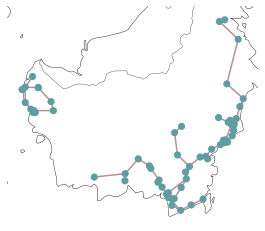

In [15]:
# determine the connected components (again?)

network.determine_network_topology()

network.plot()

In [16]:
# recalculate all electrical properties

network.lines["type"] = network.lines.voltage.map({150 : "NAYY 4x150 SE"})

network.lines["num_parallel"] = network.lines.cables/3.*network.lines.wires/network.lines.voltage.map({150 : 2.})

network.lines["s_nom"] = 3.**0.5*network.lines.voltage*network.lines.num_parallel*network.lines.voltage.map({150 : 2.})*0.65

In [17]:
power_plants = pd.read_csv('database/generators_kalimantan.csv', sep = ",", quotechar = "'")

In [18]:
power_plants

,"""",name,bus,p_nom,carrier,marginal_cost,""".1"
0,"""",PLTD_Lemukutan,4,0.412,Oil,3.00,""""
1,"""",PLTU_Kalbar_1_Unit_1,3,125.000,Coal,0.13,""""
2,"""",PLTU_Kalbar_1_Unit_2,2,125.000,Coal,0.13,""""
3,"""",PLTU_Parit_Baru_Site_Bengkayang_#01,11,55.000,Coal,0.13,""""
4,"""",PLTU_Parit_Baru_Site_Bengkayang_#02,11,55.000,Coal,0.13,""""
...,...,...,...,...,...,...,...
404,"""",PLTBm_Talisayan_DL,59,0.260,Biomass,3.00,""""
405,"""",PLTD_Derawan,59,1.270,Oil,3.00,""""
406,"""",PLTS_Derawan,59,0.090,Oil,3.00,""""
407,"""",PLTD_Batu_Putih,59,0.820,Oil,3.00,""""


In [24]:
pypsa.io.import_components_from_dataframe(network, power_plants, "Generator")

In [25]:
network.generators

,"""",name,bus,p_nom,carrier,marginal_cost,""".1",control,type,p_nom_extendable,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
0,"""",PLTD_Lemukutan,4,0.412,Oil,3.00,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
1,"""",PLTU_Kalbar_1_Unit_1,3,125.000,Coal,0.13,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
2,"""",PLTU_Kalbar_1_Unit_2,2,125.000,Coal,0.13,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
3,"""",PLTU_Parit_Baru_Site_Bengkayang_#01,11,55.000,Coal,0.13,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
4,"""",PLTU_Parit_Baru_Site_Bengkayang_#02,11,55.000,Coal,0.13,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,"""",PLTBm_Talisayan_DL,59,0.260,Biomass,3.00,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
405,"""",PLTD_Derawan,59,1.270,Oil,3.00,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
406,"""",PLTS_Derawan,59,0.090,Oil,3.00,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


(<matplotlib.collections.PatchCollection at 0x1a1ef0e9f40>,
 <matplotlib.collections.LineCollection at 0x1a1ef101700>)

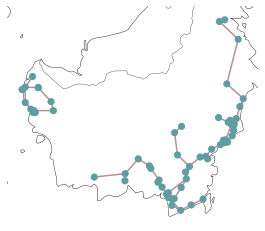

In [26]:
# determine the connected components again for checking the generators (perhaps)

network.determine_network_topology()

network.plot()

In [29]:
def generate_dummy_graph(network):
    graph = pypsa.descriptors.OrderedGraph()

    #add positions to graph for voronoi cell computation
    for nodes in graph.nodes():
        graph.nodes[nodes]["pos"] = np.array(network.buses.loc[nodes,["x","y"]],dtype=float)

    return graph

In [30]:
graph = generate_dummy_graph(network)

graph.name = "kalimantan_01"

In [ ]:
#from utility import graph

In [ ]:
#poly = Polygon([[106.5,3.1],[121.7,5.1],[116.5,-5.6],[109.2,-4.2]])

In [ ]:
"""
def voronoi_partition(G, outline):
    """
    For 2D-embedded graph `G`, within the boundary given by the shapely polygon
    `outline`, returns `G` with the Voronoi cell region as an additional node
    attribute.
    """
    G = graph.polygon_subgraph(G, outline, copy=False)
    points = list(graph.get_node_attributes(G, 'pos').values())
    regions = graph.voronoi_partition_pts(points, outline, no_multipolygons=True)
    nx.set_node_attributes(G, 'region', dict(zip(G.nodes(), regions)))

    return G

"""

In [ ]:
#voronoi_partition(graph, poly)

In [31]:
from pypsa.networkclustering import get_clustering_from_busmap, busmap_by_kmeans

In [32]:
weighting = pd.Series(1, network.buses.index)
busmap2 = busmap_by_kmeans(network, bus_weightings=weighting, n_clusters=20)

In [33]:
C2 = get_clustering_from_busmap(network, busmap2)
nc2 = C2.network

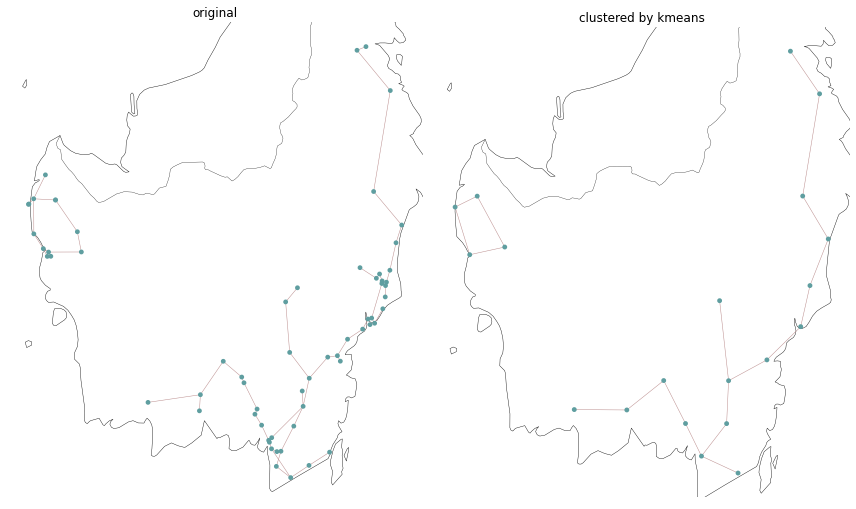

In [34]:
fig, (ax, ax1) = plt.subplots(1, 2, subplot_kw={"projection": ccrs.EqualEarth()}, figsize=(12,12))
plot_kwrgs = dict(bus_sizes=1e-3, line_widths=0.5)
network.plot(ax=ax, title="original", **plot_kwrgs)
nc2.plot(ax=ax1, title="clustered by kmeans", **plot_kwrgs)
fig.tight_layout()

In [35]:
nc2.buses

,type,x,y,v_nom,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network,generator
Bus,,,,,,,,,,,,
0,substation,113.745933,-2.116600,150.0,AC,None,1.0,0.0,inf,PQ,0,NaN
1,substation,109.239680,0.045260,150.0,AC,None,1.0,0.0,inf,Slack,1,0
10,substation,117.081444,-0.484733,150.0,AC,None,1.0,0.0,inf,PQ,0,NaN
11,substation,114.278967,-2.855033,150.0,AC,None,1.0,0.0,inf,PQ,0,NaN
12,substation,111.703700,-2.615200,150.0,AC,None,1.0,0.0,inf,Slack,0,57
13,substation,108.909200,0.864233,150.0,AC,None,1.0,0.0,inf,PQ,1,NaN
14,substation,110.047100,0.177450,150.0,AC,None,1.0,0.0,inf,PQ,1,NaN
15,substation,115.536700,-3.706733,150.0,AC,None,1.0,0.0,inf,PQ,0,NaN
16,substation,114.676214,-3.415429,150.0,AC,None,1.0,0.0,inf,PQ,0,NaN


In [36]:
nc2.lines

,bus0,bus1,length,type,x,r,g,b,s_nom,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
1,0,11,101.234410,NAYY 4x150 SE,0.0,0.0,0.0,0.0,337.749907,False,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,8,108.041303,NAYY 4x150 SE,0.0,0.0,0.0,0.0,337.749907,False,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,13,98.200017,NAYY 4x150 SE,0.0,0.0,0.0,0.0,337.749907,False,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,14,90.976105,NAYY 4x150 SE,0.0,0.0,0.0,0.0,337.749907,False,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10,2,81.671217,NAYY 4x150 SE,0.0,0.0,0.0,0.0,337.749907,False,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10,6,100.553878,NAYY 4x150 SE,0.0,0.0,0.0,0.0,337.749907,False,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11,16,76.342843,NAYY 4x150 SE,0.0,0.0,0.0,0.0,337.749907,False,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,12,8,134.596348,NAYY 4x150 SE,0.0,0.0,0.0,0.0,337.749907,False,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,13,9,60.568340,NAYY 4x150 SE,0.0,0.0,0.0,0.0,675.499815,False,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
nc2.generators

,"""",name,bus,p_nom,carrier,marginal_cost,""".1",control,type,p_nom_extendable,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
0,"""",PLTD_Lemukutan,1,0.412,Oil,3.00,"""",Slack,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
1,"""",PLTU_Kalbar_1_Unit_1,13,125.000,Coal,0.13,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
2,"""",PLTU_Kalbar_1_Unit_2,13,125.000,Coal,0.13,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
3,"""",PLTU_Parit_Baru_Site_Bengkayang_#01,9,55.000,Coal,0.13,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
4,"""",PLTU_Parit_Baru_Site_Bengkayang_#02,9,55.000,Coal,0.13,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,"""",PLTBm_Talisayan_DL,6,0.260,Biomass,3.00,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
405,"""",PLTD_Derawan,6,1.270,Oil,3.00,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
406,"""",PLTS_Derawan,6,0.090,Oil,3.00,"""",PQ,,False,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
